In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Read Data
df = pd.read_csv('001project.csv')

In [5]:
#Display all Data
df

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,0,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,2480,1423,1.3,1873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,NaN,10.4,8740,0,1.0,210,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,2160,0,1.0,190,1300,0,2,0.4,Thursday,Thursday
997,999,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,5.1,6050,1619,1.1,6827,837000,22400000,24,3.6,Tuesday,Monday


#Create numpy array of numeric data

Die Daten sind eher nicht homogen verteilt, da die Standardabweichung der einzelnen Spalten sehr unterschiedlich ist.Die Spalte "TOTAL_TIME_STREAMED" hat eine sehr hohe Standardabweichung, was darauf hindeutet, dass die Werte in dieser Spalte weit auseinander liegen. Die Spalte "AVG_GAMES_PER_STREAM" hat eine sehr niedrige Standardabweichung, was darauf hindeutet, dass die Werte in dieser Spalte sehr nah beieinander liegen.



In [6]:
arr = np.array(df[['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM',
                   'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS',
                   'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']], dtype=np.float32)

mean = np.mean(arr, axis=0)
std = np.std(arr, axis=0)
var = np.var(arr, axis=0)
median = np.median(arr, axis=0)

print(f"{'Metric':<40}{'Mittelwert':<20}{'Standardabweichung':<20}{'Varianz':<20}{'Median':<20}")
labels = ['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM',
          'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']
for i in range(len(mean)):
    print(f"{labels[i]:<40}{mean[i]:<20.4f}{std[i]:<20.4f}{var[i]:<20.4f}{median[i]:<20.4f}")

Metric                                  Mittelwert          Standardabweichung  Varianz             Median              
AVERAGE_STREAM_DURATION                 5.9967              3.2394              10.4937             5.4000              
FOLLOWERS_GAINED_PER_STREAM             3383.4456           2741.3232           7514853.0000        2450.0000           
AVG_VIEWERS_PER_STREAM                  19595.0840          43219.9375          1867962880.0000     6393.0000           
AVG_GAMES_PER_STREAM                    1.4779              0.5749              0.3305              1.3000              
TOTAL_TIME_STREAMED                     6504.7417           6727.7944           45263216.0000       4756.0000           
TOTAL_FOLLOWERS                         919403.3750         1724587.1250        2974200889344.0000  437000.0000         
TOTAL_VIEWS                             30014780.0000       62771840.0000       3940303660646400.00006950000.0000        
TOTAL_GAMES_STREAMED           

3 niedrigste und 3 höchste Werte der Spalte "TOTAL_TIME_STREAMED"

In [7]:
#Sortiere das Array
sorted_array = sorted(arr[:, 4])

#Drei niedrigste Werte
lowest_values = sorted_array[:3]

#Drei höchste Werte
highest_values = sorted_array[-3:]

print("Die drei niedrigsten Werte:", lowest_values)
print("Die drei höchsten Werte:", highest_values)

Die drei niedrigsten Werte: [27.0, 27.0, 39.0]
Die drei höchsten Werte: [44732.0, 52432.0, 90920.0]


Spaltenbezeichnungen sind sprechend gewählt, keine Änderungen nötig

In [8]:
#alles von davor mit pandas
data = df[['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM',
           'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM',
           'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS',
           'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED',
           'ACTIVE_DAYS_PER_WEEK']]

# Statistische Berechnungen mit Pandas
mean = data.mean()
std = data.std()
var = data.var()
median = data.median()

# Zusammenstellen der Statistiken in einem DataFrame
stats_df = pd.DataFrame({
    'Mittelwert': mean,
    'Standardabweichung': std,
    'Varianz': var,
    'Median': median
})

print(stats_df)


                               Mittelwert  Standardabweichung       Varianz  \
AVERAGE_STREAM_DURATION      5.996697e+00        3.241013e+00  1.050417e+01   
FOLLOWERS_GAINED_PER_STREAM  3.383445e+03        2.742696e+03  7.522383e+06   
AVG_VIEWERS_PER_STREAM       1.959508e+04        4.324158e+04  1.869835e+09   
AVG_GAMES_PER_STREAM         1.477878e+00        5.751893e-01  3.308428e-01   
TOTAL_TIME_STREAMED          6.504742e+03        6.731164e+03  4.530857e+07   
TOTAL_FOLLOWERS              9.194033e+05        1.725451e+06  2.977181e+12   
TOTAL_VIEWS                  3.001478e+07        6.280328e+07  3.944252e+15   
TOTAL_GAMES_STREAMED         1.417077e+02        2.459305e+02  6.048179e+04   
ACTIVE_DAYS_PER_WEEK         3.591391e+00        1.797796e+00  3.232070e+00   

                                Median  
AVERAGE_STREAM_DURATION            5.4  
FOLLOWERS_GAINED_PER_STREAM     2450.0  
AVG_VIEWERS_PER_STREAM          6393.0  
AVG_GAMES_PER_STREAM               1.3  
TOTA

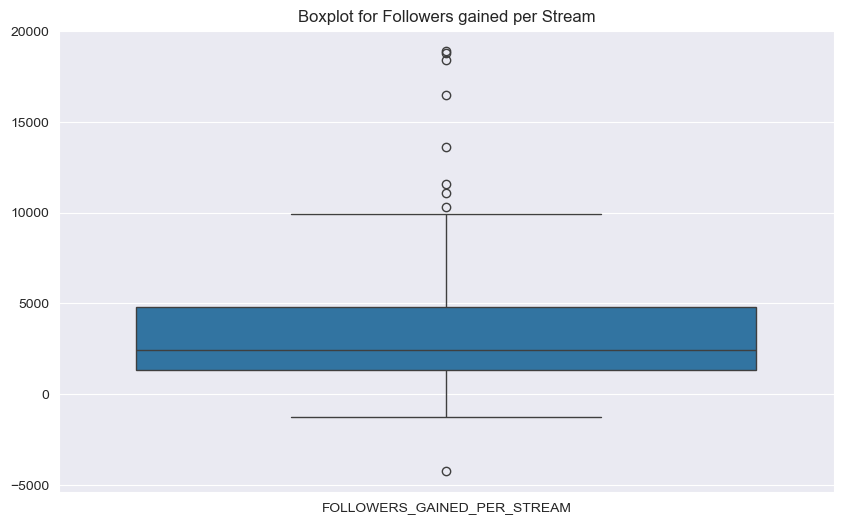

In [9]:
#Show data as boxplot with seaborn but only the for Followed gained per stream
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FOLLOWERS_GAINED_PER_STREAM']])
plt.title('Boxplot for Followers gained per Stream')
plt.show()



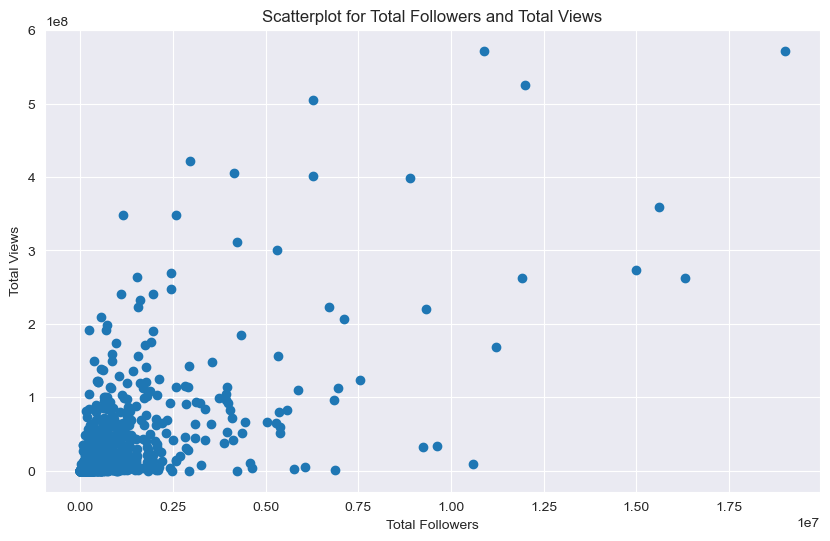

In [10]:
#Create a Scatterplot for the columns 'TOTAL_FOLLOWERS' and 'TOTAL_VIEWS' 
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTAL_FOLLOWERS'], df['TOTAL_VIEWS'])
plt.xlabel('Total Followers')
plt.ylabel('Total Views')
plt.title('Scatterplot for Total Followers and Total Views')
plt.show()

Es gibt keine Duplikate in den Daten.

In [11]:
#Search for duplicates
duplicates = df.duplicated()
duplicates.sum()

0

Es gibt keine irelevanten Daten, da alle für unser Modell relevant sind.

In [12]:
#Check for missing values
missing_values = df.isnull().sum()
missing_values

RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
2ND_MOST_STREAMED_GAME            77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64

Bei null Werten bei 2nd most streamed game wird der Wert von MOST_STREAMED_GAME übernommen. SimpleInputer würde hier keinen Sinn machen, da es sehr wahrscheinlich zu fehleinschätzungen kommen würde.

In [13]:
#If 2ND_MOST_STREAMED_GAME is missing, fill it with the MOST_STREAMED_GAME
df['2ND_MOST_STREAMED_GAME'].fillna(df['MOST_STREAMED_GAME'], inplace=True)

In [47]:
from sklearn.ensemble import RandomForestRegressor

features = ['AVERAGE_STREAM_DURATION', 'TOTAL_FOLLOWERS',
            'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'RANK', 'TOTAL_VIEWS',
            'ACTIVE_DAYS_PER_WEEK']
X = df[features]
y = df['AVG_VIEWERS_PER_STREAM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'\nRandom Forest - MSE: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')

Mean Squared Error (MSE): 1139956722.3757966
R² Score: 0.36718587860576346

Random Forest - MSE: 685290047.8273336
Random Forest - R² Score: 0.6195809796952026
